<a href="https://colab.research.google.com/github/kasurashan/Math4DL/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.exp(1)

2.718281828459045

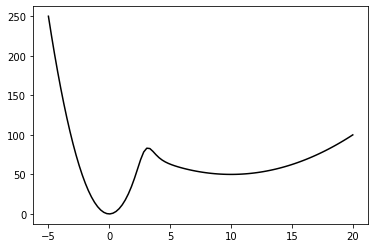

In [6]:
np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

def f(x):
  return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
  return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')
plt.show()


In [40]:
theta = np.random.random_sample(1)   # [0,1) 범위에서 난수 ***개 뽑음
theta = theta * (20-(-5)) + (-5)   # [-5, 20)
print(theta)


f_val = []

alpha = 0.01
for i in range(1000):
  theta -= alpha * fprime(theta)
  f_val.append(f(theta))

theta

[-2.04313935]


array([-0.00178])

alpha = 0.01인 경우 초기값에 따라 두 mimum에 모두 converge 함

alpha = 0.3인 경우 wide minimum (theta = 10) 에 converge 함   (sharp minimum에는 converge 하지 않음)

alpha = 4인 경우 converge하지 않음

# 문제 2 

###input : $\mathbf{x}\in\mathbb{R}^{n}$

###output : $A\textbf{x},\quad \textrm{where }A= 
\left[\begin{matrix}
    k_1 & k_2 & \cdots & k_r & 0 & \cdots &  & 0 \\
    0 & k_1 & k_2 & \cdots & k_r & 0 & \cdots & 0 \\
    \vdots & & \ddots \\ 
    0 &   \cdots & 0 & k_1 & k_2 & \cdots & & k_r
\end{matrix}\right]
\in\mathbb{R}^{(n-r+1)\times n}$

참고) 머신러닝에서는 위의 연산 $A\textbf{x}$를 

filter (또는 receptive field) $k=(k_1,\cdots,k_r)\in\mathbb{R}^r$를 이용한

$\textbf{x}$의 **Convolution 컨볼루션**이라고 한다.

(수학, 신호처리에서는

kernel $k$를 이용한 $\textbf{x}$의 cross-correlation이라고 한다.)

\\

###정답 : $\textbf{b}\in\mathbb{R}^{n-r+1}$

\\

###Loss function : **Huber** loss 사용

###$\underset{\textbf{x}\in\mathbb{R}^n}{\textrm{argmin}}\ [\ l(A\textbf{x}-\textbf{b})+\cfrac{\lambda}{2}\|\textbf{x}\|^2\ ]$


\\
###**Huber loss** 
: 오차가 특정 값 이하면 L2 norm을 , 이상이면 L1 norm을 사용해서 

Outlier에 덜 민감하도록 함 (Robust)

$l:\mathbb{R}^m\rightarrow\mathbb{R}$일 때, element-wise Huber loss는 다음과 같다.

$l(y)=\overset{m}{\underset{i=1}{\sum}}h(y_i), \quad \textrm{where } h = \begin{cases}\frac{1}{2}x^2 \ \quad\quad \textrm{for } |x|\leq 1  \\ |x|-\frac{1}{2} \quad \textrm{otherwise}   \end{cases} $

참고) $\frac{1}{2}$를 곱해주고, 빼주는 이유는 Huber loss가 연속이면서 미분 가능하도록 하기 위한 장치 

(연속, 미분가능하면 Gradient Descent 사용 가능해서 optimizing하기 쉬워짐)




In [31]:
import matplotlib.pyplot as plt

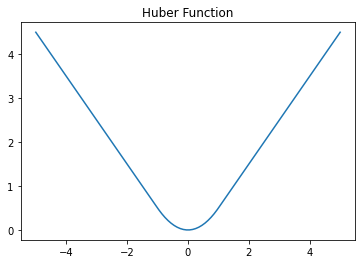

In [32]:
def huber_function(x):
  return 1/2*(x**2)*(np.abs(x)<=1) + (np.abs(x)-1/2)*(np.abs(x)>1)

x = np.linspace(-5, 5, 100)
y = huber_function(x)
plt.title("Huber Function")
plt.plot(x,y)

##Gradient Descent를 통해 위의 loss function을 최소화하는 $\textbf{x}$를 찾는 것이 목표 (by 코딩)

즉, $l$과 $\nabla l$을 계산해야 한다.


참고) duck typing

객체의 적합성은 객체의 실제 유형이 아니라 특정 메소드와 속성의 존재에 의해 결정되는 것

https://wikidocs.net/16076

In [2]:
import numpy as np

In [86]:
# filter k는 특정 길이의 1차원 array
# 이 필터를 이용해서 행렬 A를 직접 구성하는 것은 비효율적임 (A의 성분에 0이 너무 많아서 낭비임)
# 그래서 A를 직접 구성하는 대신 (벡터*행렬) 곱하는 method를 갖고 있는 object로 만듦
# 우리가 하려는 것
# 1. 어떤 filter를 받아서 행렬 A를 대신하는 object를 구성 (__init__)
# 2. 위에서 생성한 object에 벡터 x를 곱할 수 있게 method 만들기 (__matmul__) :   A@x
# 3. Transpose된 행렬에도 벡터 곱할 수 있게 만들기 :   A.T @ x  (__matmul__)    <-   duck typing 


class Convolution1d:
  def __init__(self, filt):
    self.__filt = filt
    self.__r = filt.size
    self.T = TransposedConvolution1d(self.__filt)   # A.T @ x : 이미 선언된 오브젝트 A의 self.T공간에 저장된 TransposedConvolution1d 클래스를 불러옴 
                                                    # 그 후 TransposedConvolution1d 클래스의 __ matmul__ 메소드를 이용해 A.T @ x 계산 
  def __matmul__(self, vector):
    r = self.__r
    n = vector.size
    
    return np.asarray([ np.dot(self.__filt, vector[idx:idx+r]) for idx in range(n-r+1)])

class TransposedConvolution1d:   # Transpose된 행렬과의 곱셈을 위한 클래스 정의
  def __init__(self, filt):
    self.__filt = filt
    self.__r = filt.size
  def __matmul__(self, vector):
    r = self.__r
    n = vector.size + r - 1   # transpose 된 행렬에 맞는 크기의 벡터가 곱해진다고 가정하고 딱히 예외처리는 안 하겠음
    return np.asarray([ np.dot(self.__filt[:idx][::-1], vector[:idx]) if idx<r \
                       else np.dot(self.__filt[::-1], vector[idx-r:idx]) if idx<=n-r \
                       else np.dot(self.__filt[::-1][:n-idx+1], vector[idx-r:])  for idx in range(1, n+1)])



In [87]:
def huber_loss(x):   # 행렬 성분별로 huber loss 계산 후 다 더해준다 -> return : 스칼라
  return np.sum((1/2)*(x**2) * (np.abs(x)<=1) + (np.abs(x) - 1/2) * (np.abs(x)>1))

def huber_grad(x):   # gradient 계산 -> return : 벡터
  return x * (np.abs(x) <= 1) + np.sign(x) * (np.abs(x) > 1)

In [88]:
r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)

In [89]:
x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)

0.4587586843129764


참고) A 행렬을 직접 구성하는 법

In [1]:
from scipy.linalg import circulant

In [ ]:
A = circulant(np.concatenate((np.flip(k), np.zeros(n-r))))[r-1:, :]